In [731]:
import numpy as np
import pandas as pd
from shapely.geometry import Point
# import geopandas as gpd
# from geopandas import GeoDataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Visualisation des données

In [732]:
df = pd.read_csv("csv/kc_house_data.csv")

In [733]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [734]:
df.head(6)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [735]:
df[df.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [736]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT000000')

In [737]:
# df['date'] = df["date"].dt.strftime('%Y-%m')
df.head(6)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [738]:
mask = (df["bedrooms"] != 0) & (df["bedrooms"] < 33)
mask2 = df["bathrooms"] != 0 

In [739]:
df = df[mask & mask2]

# Visualisation Carte

In [740]:

# geometry = [Point(xy) for xy in zip(df["long"],df["lat"])]
# geo_df = GeoDataFrame(df,geometry =geometry)
# kings_county = gpd.read_file('School_Districts_in_King_County___schdst_area/School_Districts_in_King_County___schdst_area.shp')

# fig, ax = plt.subplots(figsize = (20,20))
# kings_county.plot(ax=ax, alpha = 0.75, color = 'black')

# geo_df[geo_df['price'] < 750000].plot(ax = ax , markersize = 1, color = 'green',marker = '+',label = 'Price < 750k = green',aspect = 1.5)
# geo_df[geo_df['price'] >= 750000].plot(ax = ax , markersize = 1,color = 'red',marker = '+',label = 'Price >= 750k = Red', aspect = 1.5)


# plt.legend(prop = {'size':10} )
# ax.set_title('Houses in Kings County, WA', fontdict = {'fontsize':
#                 16})
# ax.set_ylabel('Latitude',fontdict = {'fontsize': 16})
# ax.set_xlabel('Longitude',fontdict = {'fontsize': 16})


# plt.show()

In [741]:

fig = px.scatter_mapbox(df,lat='lat',lon='long',center=dict(lat=df.lat.mean(), lon=df.long.mean()),color = df.price, zoom=7,
                        mapbox_style="carto-darkmatter",color_continuous_scale= [
                [0, "green"],
                [(750000)/df.price.max(), "green"],
                [(750001)/df.price.max(), "red"],
                [1, "red"]],
                        opacity = 1,size_max=1)
                        
fig.update_layout(title = 'Houses in Kings County, WA, 2014-2015', title_x=0.5)
fig.show()

In [742]:
# df["year"] = df.date.dt.year
df["month"] = df.date.dt.month
# df["day"] = df.date.dt.day


# Corrélation

In [743]:
df[df.columns[1:]].corr()['price'][:].sort_values(ascending=False).to_frame()

,price
price,1.000000
sqft_living,0.701921
grade,0.667935
sqft_above,0.605395
sqft_living15,0.585273
bathrooms,0.525915
view,0.397323
sqft_basement,0.323772
bedrooms,0.315966
lat,0.306772


In [744]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month'],
      dtype='object')

# One hot encoder

In [745]:
df["zipcode"] = df["zipcode"].astype(str)
df_dum = pd.get_dummies(df)

In [746]:
# columns_useful = [ 'price', 'bedrooms', 'bathrooms', 'sqft_living',
#        'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
#        'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
#        'sqft_living15', 'sqft_lot15','year',
#        'month', 'day']
# df=df[columns_useful]

In [747]:
# df = df.reindex(columns= ['sqft_living','sqft_lot','floors', 'bedrooms', 'bathrooms', 
#        'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
#        'sqft_living15', 'sqft_lot15','year',
#        'month', 'day','price'])

In [748]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21612
Data columns (total 91 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21596 non-null  int64         
 1   date           21596 non-null  datetime64[ns]
 2   price          21596 non-null  float64       
 3   bedrooms       21596 non-null  int64         
 4   bathrooms      21596 non-null  float64       
 5   sqft_living    21596 non-null  int64         
 6   sqft_lot       21596 non-null  int64         
 7   floors         21596 non-null  float64       
 8   waterfront     21596 non-null  int64         
 9   view           21596 non-null  int64         
 10  condition      21596 non-null  int64         
 11  grade          21596 non-null  int64         
 12  sqft_above     21596 non-null  int64         
 13  sqft_basement  21596 non-null  int64         
 14  yr_built       21596 non-null  int64         
 15  yr_renovated   2159

In [749]:
df_dum[df_dum.columns[1:]].corr()['price'][:].sort_values(ascending=False).to_frame().head(20)

,price
price,1.000000
sqft_living,0.701921
grade,0.667935
sqft_above,0.605395
sqft_living15,0.585273
bathrooms,0.525915
view,0.397323
sqft_basement,0.323772
bedrooms,0.315966
lat,0.306772


# Colonnes qui sont gardés

In [750]:
df_dum["quartier"]= df_dum["zipcode_98004"]  +df_dum["zipcode_98006"]+df_dum["zipcode_98033"]+ df_dum["zipcode_98039"] + df_dum["zipcode_98040"]+df_dum["zipcode_98105"] + df_dum["zipcode_98112"]

In [751]:
df_dum["is_renovated"]= df_dum['yr_renovated'] > 0
df_dum["is_renovated"] = df_dum["is_renovated"].astype("int")

In [752]:
df_dum.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'month', 'zipcode_98001',
       'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
       'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058',
       'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072',
       'zipcode_98074', 'zipcode_9807

In [753]:
df_dum_save = df_dum[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'lat',
       'long', 'sqft_living15', 'sqft_lot15','quartier', 'is_renovated',"price"]]

In [754]:
df_dum_save

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,quartier,is_renovated,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,47.5112,-122.257,1340,5650,0,0,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,47.7210,-122.319,1690,7639,0,1,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,47.7379,-122.233,2720,8062,0,0,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,47.5208,-122.393,1360,5000,0,0,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,47.6168,-122.045,1800,7503,0,0,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,47.6993,-122.346,1530,1509,0,0,360000.0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,47.5107,-122.362,1830,7200,0,0,400000.0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,47.5944,-122.299,1020,2007,0,0,402101.0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,47.5345,-122.069,1410,1287,0,0,400000.0


In [755]:
df_dum_save[df_dum_save.columns[0:]].corr()['price'][:].sort_values(ascending=False).to_frame()

,price
price,1.000000
sqft_living,0.701921
grade,0.667935
sqft_above,0.605395
sqft_living15,0.585273
bathrooms,0.525915
quartier,0.436450
view,0.397323
sqft_basement,0.323772
bedrooms,0.315966


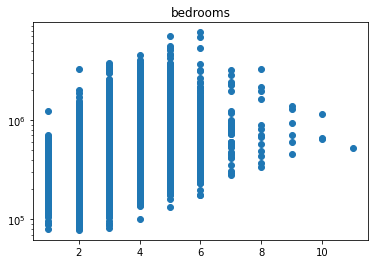

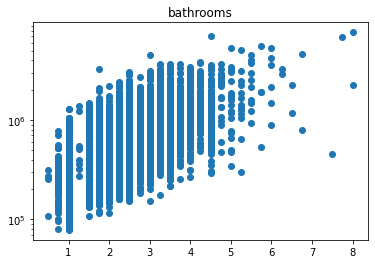

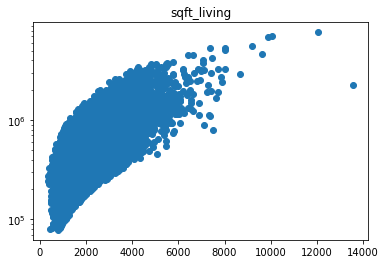

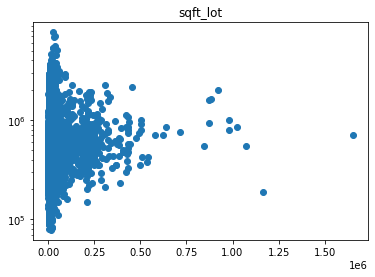

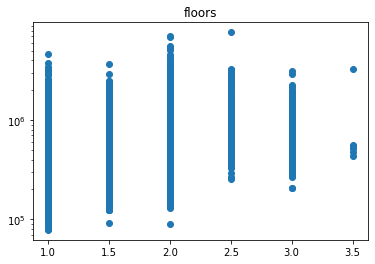

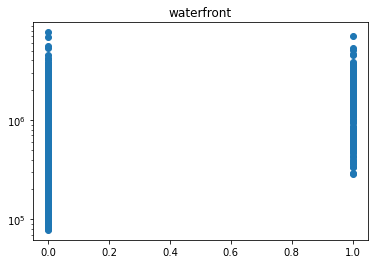

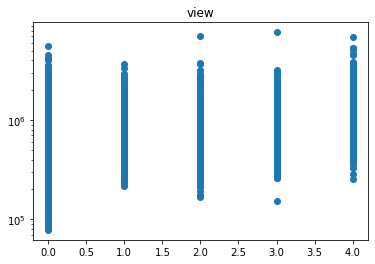

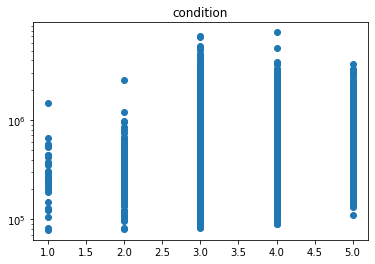

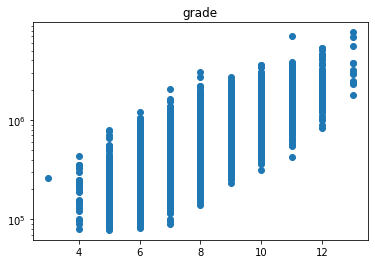

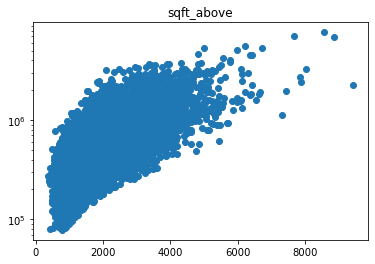

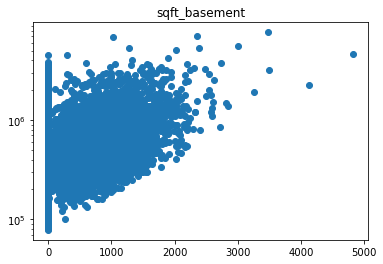

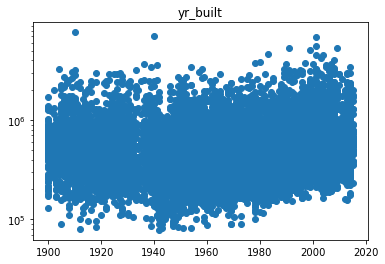

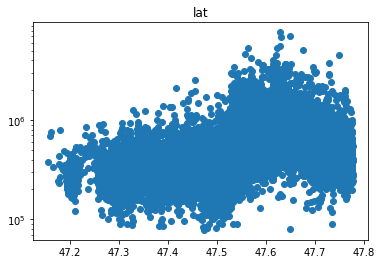

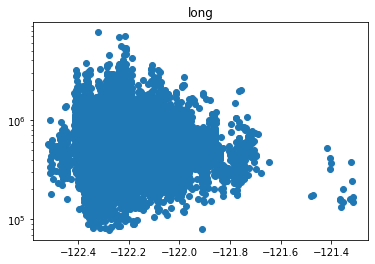

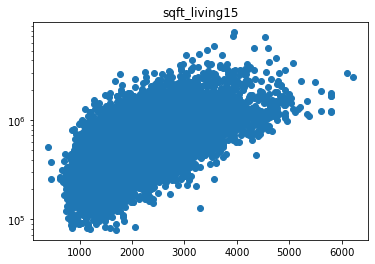

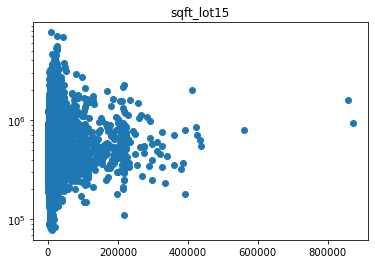

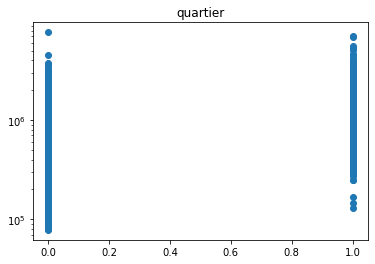

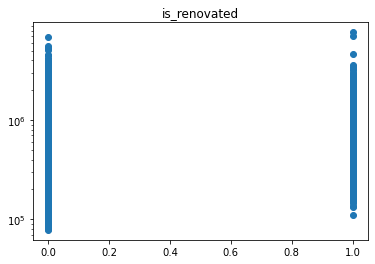

In [756]:
for column in df_dum_save.columns[0:-1] :
    plt.scatter(df_dum_save[column],df_dum_save["price"])
    plt.yscale('log')
    plt.title(column)
    plt.show()

# Export en csv

In [757]:
df_dum_save.to_csv('csv/df_preparation.csv',index=False)